# PML Mini-Project

### Netflix Content based analysis: Netflix Thumbnails investigation

#### Does a recommendation system replicate similar results to an existing public product? 
I will make use of a user with no background data to investigate the similarities.

Using a pretrained model for recommendations, with input of a netflix movies and tv shows dataset, I will investigate and analyse any bias in the recommendation system and how/if  that correlates visually to a user on a browser.

> REF: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

## Content based filtering

In [3]:
import pandas as pd 
import numpy as np 
import json
import matplotlib.pyplot as plt

In [4]:
#loading in the dataset
movies=pd.read_csv(r"C:\Users\luoco\Documents\Personalisation-22-23\data\netflix_titles.csv")
#credits=pd.read_csv(r"C:\Users\luoco\Documents\Personalisation-22-23\data\netflix_credits.csv")

In [5]:
movies
#'movies' is movies and shows.
#having looked at the credits file correlated to the movies, it is not needed to work with.

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [6]:
movies.shape

(5850, 15)

In [7]:
movies.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [8]:
#check for null/nan values
movies.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [9]:
#I don't want to just drop all of the Nan values straight away because then I'll lose data.
# all the columns with a scoring system I will change to 0, then drop the rest.

movies['imdb_score'] = movies['imdb_score'].fillna(0)
movies['imdb_votes'] = movies['imdb_votes'].fillna(0)
movies['tmdb_popularity'] = movies['tmdb_popularity'].fillna(0)
movies['tmdb_score'] = movies['tmdb_score'].fillna(0)

In [10]:
#check again for null/nan values
movies.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [11]:
# lets drop some columns to retain data elsewhere
movies.drop(['age_certification','seasons', 'imdb_id'], axis=1)

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,['documentation'],['US'],0.0,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"['romance', 'drama']",['NG'],6.8,45.0,1.466,0.000
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,['drama'],[],7.7,348.0,0.000,0.000
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,['comedy'],['CO'],3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],['US'],0.0,0.0,1.296,10.000


In [12]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [13]:
print(movies['type'].unique)

<bound method Series.unique of 0        SHOW
1       MOVIE
2       MOVIE
3       MOVIE
4       MOVIE
        ...  
5845    MOVIE
5846    MOVIE
5847    MOVIE
5848    MOVIE
5849     SHOW
Name: type, Length: 5850, dtype: object>


In [14]:
#check once more for null/nan values
movies.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [15]:
movies = movies.dropna()
#leaves us with 1749 shows or movies

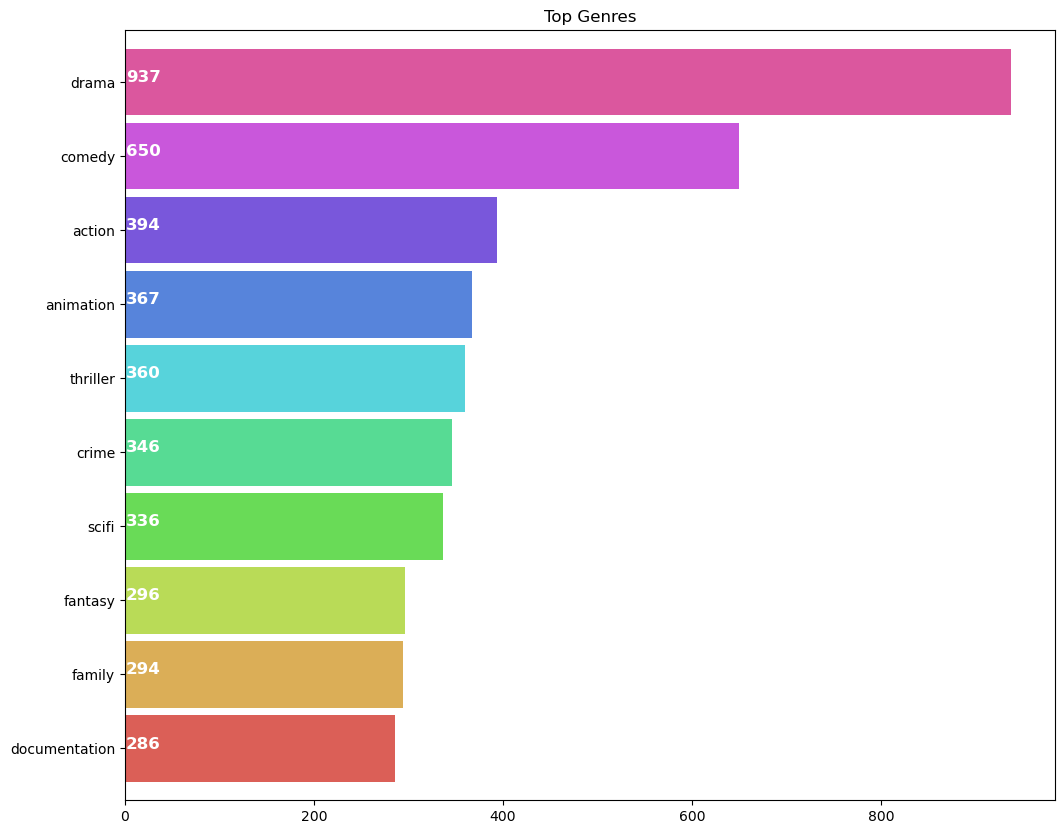

In [16]:
import seaborn as sns

plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [17]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

C:\Users\luoco\AppData\Local\Temp\ipykernel_5264\1469821455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
C:\Users\luoco\AppData\Local\Temp\ipykernel_5264\1469821455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].str.split(',')


In [18]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:19]

#this producesa  list of all of the unique genres in the dataset

#playing with the value in 'genreList[:20]' allows me to see all of the possible unique genres.
# beyond 20 does not produce any more unique genres.

['comedy',
 'european',
 'action',
 'crime',
 'drama',
 'scifi',
 'animation',
 'family',
 'fantasy',
 'music',
 'romance',
 'reality',
 'thriller',
 'western',
 'horror',
 'sport',
 'documentation',
 'war',
 'history']

In [19]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

## Using One Hot Encoding
The following code will represent the genres as a feature vecture that we can use for a recommender. 

In [20]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

C:\Users\luoco\AppData\Local\Temp\ipykernel_5264\4265422500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))


5     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
26    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
35    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
44    [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
45    [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [21]:
from scipy import spatial

def Similarity(movieId1, movieId2):        # taking the id code of one movie and another movie to get the similarity
    a = movies.iloc[movieId1]              #.iloc => is integer location
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    return genreDistance   

In [22]:
Similarity(1, 50) #checking similarity between any 2 random movies, of number 1 and number 50

1.0

In [23]:
print(movies.iloc[1])
print(movies.iloc[50])

##printing the details of both for comparison

id                                                                ts45948
title                                    Monty Python's Fliegender Zirkus
type                                                                 SHOW
description             Monty Python's Fliegender Zirkus consisted of ...
release_year                                                         1972
age_certification                                                   TV-MA
runtime                                                                43
genres                                                           [comedy]
production_countries                                                   []
seasons                                                               1.0
imdb_id                                                         tt0202477
imdb_score                                                            8.1
imdb_votes                                                         2151.0
tmdb_popularity                       

In [24]:
new_id = list(range(0,movies.shape[0]))
movies['new_id'] = new_id
movies = movies[['title','genres','imdb_score','genres_bin','new_id']]
movies.head()

C:\Users\luoco\AppData\Local\Temp\ipykernel_5264\2373966413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['new_id'] = new_id


,title,genres,imdb_score,genres_bin,new_id
5,Monty Python's Flying Circus,"[comedy, european]",8.8,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
26,Monty Python's Fliegender Zirkus,[comedy],8.1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
35,Seinfeld,[comedy],8.9,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
44,Knight Rider,"[action, crime, drama, scifi]",6.9,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
45,Thomas & Friends,"[action, animation, comedy, drama, family, fan...",6.5,"[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",4


In [25]:
movies

,title,genres,imdb_score,genres_bin,new_id
5,Monty Python's Flying Circus,"[comedy, european]",8.8,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
26,Monty Python's Fliegender Zirkus,[comedy],8.1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
35,Seinfeld,[comedy],8.9,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
44,Knight Rider,"[action, crime, drama, scifi]",6.9,"[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
45,Thomas & Friends,"[action, animation, comedy, drama, family, fan...",6.5,"[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",4
...,...,...,...,...,...
5785,Only Jokes Allowed,[comedy],4.9,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1744
5801,We Are: The Brooklyn Saints,"[documentation, sport]",6.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1745
5819,Alma Matters: Inside the IIT Dream,"[documentation, drama]",8.3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1746
5830,Let's Eat,"[comedy, drama]",8.2,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1747


## Using K-NN to produce 10 recommendations

In [26]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 15
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
   

In [27]:
predict_score('Thomas & Friends')

Selected Movie:  Thomas & Friends

Recommended Movies: 

Ever After High | Genres: 'action','animation','comedy','drama','family','fantasy','music','romance' | Rating: 7.7
Dokidoki! PreCure | Genres: 'action','animation','comedy','drama','family','fantasy' | Rating: 6.2
Maya and the Three | Genres: 'action','animation','comedy','drama','family','fantasy' | Rating: 8.1
Thomas & Friends: All Engines Go! | Genres: 'animation','comedy','drama','family','fantasy','music' | Rating: 2.0
Yu-Gi-Oh! | Genres: 'action','animation','comedy','drama','family','fantasy','scifi' | Rating: 7.3
My Little Pony: Friendship Is Magic | Genres: 'animation','comedy','drama','family','fantasy','music','scifi' | Rating: 7.6
The Legend of Korra | Genres: 'action','animation','comedy','drama','family','fantasy','scifi' | Rating: 8.4
Talking Tom and Friends | Genres: 'action','animation','comedy','drama','european','family','fantasy' | Rating: 6.1
Pac-Man and the Ghostly Adventures | Genres: 'action','animation','

In [28]:
predict_score('Knight Rider')

Selected Movie:  Knight Rider

Recommended Movies: 

Arrow | Genres: 'action','crime','drama','scifi','thriller' | Rating: 7.5
Gotham | Genres: 'action','crime','drama','scifi','thriller' | Rating: 7.8
Vanished 46 | Genres: 'action','crime','drama','scifi','thriller' | Rating: 8.2
Wu Assassins | Genres: 'action','crime','drama','fantasy','scifi' | Rating: 6.4
In from the Cold | Genres: 'action','crime','drama','scifi','thriller' | Rating: 6.2
The One | Genres: 'action','crime','drama','scifi','thriller' | Rating: 6.6
Stargate SG-1 | Genres: 'action','drama','scifi' | Rating: 8.4
The 100 | Genres: 'action','drama','scifi' | Rating: 7.6
DC's Legends of Tomorrow | Genres: 'action','drama','scifi' | Rating: 6.8
Supergirl | Genres: 'action','drama','scifi' | Rating: 6.2
Wanted | Genres: 'action','crime','drama' | Rating: 7.6
The Paper | Genres: 'action','crime','drama' | Rating: 7.4
Mind Game | Genres: 'action','crime','drama' | Rating: 7.5
Black Lightning | Genres: 'action','drama','scifi'

In [29]:
predict_score('We Are: The Brooklyn Saints')

Selected Movie:  We Are: The Brooklyn Saints

Recommended Movies: 

Last Chance U | Genres: 'documentation','sport' | Rating: 8.4
Sunderland 'Til I Die | Genres: 'documentation','sport' | Rating: 8.1
Becoming Champions | Genres: 'documentation','sport' | Rating: 6.7
Formula 1: Drive to Survive | Genres: 'documentation','sport' | Rating: 8.6
The Least Expected Day: Inside the Movistar Team 2019 | Genres: 'documentation','sport' | Rating: 7.4
The Playbook | Genres: 'documentation','sport' | Rating: 7.4
Basketball or Nothing | Genres: 'documentation','sport' | Rating: 7.4
Home Game | Genres: 'documentation','sport' | Rating: 7.0
Cricket Fever: Mumbai Indians | Genres: 'documentation','sport' | Rating: 7.2
Last Chance U: Basketball | Genres: 'documentation','sport' | Rating: 8.3
Neymar: The Perfect Chaos | Genres: 'documentation','sport' | Rating: 6.6
Naomi Osaka | Genres: 'documentation','sport' | Rating: 6.2
Race: Bubba Wallace | Genres: 'documentation','sport' | Rating: 5.9
The Last Dan

In [30]:
predict_score('Seinfeld')

Selected Movie:  Seinfeld

Recommended Movies: 

Monty Python's Fliegender Zirkus | Genres: 'comedy' | Rating: 8.1
High Risk | Genres: 'comedy' | Rating: 3.8
The Parkers | Genres: 'comedy' | Rating: 6.8
H | Genres: 'comedy' | Rating: 7.4
Community | Genres: 'comedy' | Rating: 8.5
Arrested Development | Genres: 'comedy' | Rating: 8.7
Half & Half | Genres: 'comedy' | Rating: 7.0
One on One | Genres: 'comedy' | Rating: 7.0
Nuevo Rico Nuevo Pobre | Genres: 'comedy' | Rating: 7.1
Meet the Adebanjos | Genres: 'comedy' | Rating: 7.6
Zach Stone Is Gonna Be Famous | Genres: 'comedy' | Rating: 8.3
Schitt's Creek | Genres: 'comedy' | Rating: 8.5
Crazy Ex-Girlfriend | Genres: 'comedy' | Rating: 7.8
Kim's Convenience | Genres: 'comedy' | Rating: 8.2
Wet Hot American Summer: First Day of Camp | Genres: 'comedy' | Rating: 7.3




In [31]:
predict_score('Sweet Tooth')

Selected Movie:  Sweet Tooth

Recommended Movies: 

The Protector | Genres: 'action','drama','fantasy','scifi' | Rating: 6.5
Warrior Nun | Genres: 'action','drama','fantasy','scifi' | Rating: 6.8
Cursed | Genres: 'action','drama','fantasy','scifi' | Rating: 5.8
Shadow and Bone | Genres: 'action','drama','fantasy','scifi' | Rating: 7.6
Fate: The Winx Saga | Genres: 'action','drama','fantasy','scifi' | Rating: 6.8
Tribes of Europa | Genres: 'action','drama','fantasy','scifi' | Rating: 6.7
Merlin | Genres: 'action','drama','european','fantasy','scifi' | Rating: 7.9
Van Helsing | Genres: 'action','drama','fantasy','horror','scifi' | Rating: 6.2
Fate/Apocrypha | Genres: 'action','animation','drama','fantasy','scifi' | Rating: 6.6
The Umbrella Academy | Genres: 'action','comedy','drama','fantasy','scifi' | Rating: 8.0
The Witcher | Genres: 'action','drama','fantasy','horror','scifi' | Rating: 8.2
Alice in Borderland | Genres: 'action','drama','fantasy','scifi','thriller' | Rating: 7.6
Ragnar

In [32]:
predict_score('After Life')

Selected Movie:  After Life

Recommended Movies: 

Gilmore Girls | Genres: 'comedy','drama' | Rating: 8.2
Girlfriends | Genres: 'comedy','drama' | Rating: 7.2
Midnight Diner | Genres: 'comedy','drama' | Rating: 8.6
El Escamoso | Genres: 'comedy','drama' | Rating: 7.5
Shameless | Genres: 'comedy','drama' | Rating: 8.6
EastSiders | Genres: 'comedy','drama' | Rating: 6.8
Jane the Virgin | Genres: 'comedy','drama' | Rating: 7.8
Incomplete Life | Genres: 'comedy','drama' | Rating: 8.5
Two Fathers | Genres: 'comedy','drama' | Rating: 8.0
Grace and Frankie | Genres: 'comedy','drama' | Rating: 8.2
Unbreakable Kimmy Schmidt | Genres: 'comedy','drama' | Rating: 7.6
Master of None | Genres: 'comedy','drama' | Rating: 8.3
Easy | Genres: 'comedy','drama' | Rating: 6.9
Gilmore Girls: A Year in the Life | Genres: 'comedy','drama' | Rating: 7.6
Lady Dynamite | Genres: 'comedy','drama' | Rating: 7.3




In [33]:
predict_score('Super Monsters')

Selected Movie:  Super Monsters

Recommended Movies: 

Hotel Transylvania: The Series | Genres: 'animation','comedy','family','fantasy','horror' | Rating: 5.3
Tayo the Little Bus | Genres: 'animation','comedy','family' | Rating: 5.3
Dreamworks Happy Holidays from Madagascar | Genres: 'animation','comedy','family' | Rating: 6.5
Comedians in Cars Getting Coffee | Genres: 'animation','comedy','family' | Rating: 8.0
Barbie: Life in the Dreamhouse | Genres: 'animation','comedy','family' | Rating: 7.4
Ask the Storybots | Genres: 'animation','comedy','family' | Rating: 8.4
Simon | Genres: 'animation','comedy','family' | Rating: 7.0
Cocomelon | Genres: 'animation','comedy','family' | Rating: 4.7
Barbie: Dreamhouse Adventures | Genres: 'animation','comedy','family' | Rating: 6.7
Rainbow High | Genres: 'animation','comedy','family' | Rating: 5.8
Shaun the Sheep: Adventures from Mossy Bottom | Genres: 'animation','comedy','family' | Rating: 8.1
Alien TV | Genres: 'animation','comedy','family' | R

In [34]:
predict_score('Intimacy')

Selected Movie:  Intimacy

Recommended Movies: 

Breaking Bad | Genres: 'crime','drama','thriller' | Rating: 9.5
The Blacklist | Genres: 'crime','drama','thriller' | Rating: 8.0
How to Get Away with Murder | Genres: 'crime','drama','thriller' | Rating: 8.1
Wentworth | Genres: 'crime','drama','thriller' | Rating: 8.6
Narcos | Genres: 'crime','drama','thriller' | Rating: 8.8
Quantico | Genres: 'crime','drama','thriller' | Rating: 6.6
The Method | Genres: 'crime','drama','thriller' | Rating: 7.4
Close Your Eyes Before It's Dark | Genres: 'crime','drama','thriller' | Rating: 7.0
The Sinner | Genres: 'crime','drama','thriller' | Rating: 7.9
Ozark | Genres: 'crime','drama','thriller' | Rating: 8.5
Mindhunter | Genres: 'crime','drama','thriller' | Rating: 8.6
Manhunt | Genres: 'crime','drama','thriller' | Rating: 8.1
Elite | Genres: 'crime','drama','thriller' | Rating: 7.4
Deadwind | Genres: 'crime','drama','thriller' | Rating: 7.2
Collateral | Genres: 'crime','drama','thriller' | Rating: 6.7

##### Alternative
## Using Cosine Similarity

In [35]:
netflixmovies = pd.read_csv(r"C:\Users\luoco\Documents\Personalisation-22-23\data\netflix_titles.csv")

In [36]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflixmovies['description'] = netflixmovies['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflixmovies['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(5850, 21061)

In [37]:
#Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

#Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [38]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflixmovies.index, index=netflixmovies['title']).drop_duplicates()

 These are the to define our recommendation function :-
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [39]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflixmovies['title'].iloc[movie_indices]

In [42]:
get_recommendations('Thomas & Friends')


2513                    The Who Was? Show
2248                          Llama Llama
421                          Horrid Henry
5298    Thomas & Friends: All Engines Go!
308                             Octonauts
120                            Goosebumps
4104                  Go! Go! Cory Carson
2147      Final Fantasy XIV: Dad of Light
1310        David Brent: Life on the Road
4578                                 Gone
Name: title, dtype: object

In [43]:
get_recommendations('Knight Rider')

164                                     Knight Rider 2000
699                                              The Rite
2748    Michael Bolton's Big, Sexy Valentine's Day Spe...
638                                      Brother's Shadow
1140                                             The Take
5051                                 DOTA: Dragon's Blood
3871                            Michael McIntyre: Showman
3959                          The Knight Before Christmas
4704                              How to Change Your Mind
1533                                     The Blind Christ
Name: title, dtype: object

In [44]:
get_recommendations('We Are: The Brooklyn Saints')

1554                Coach Snoop
325             We Are Marshall
734                  Undefeated
1806            Black Lightning
2949               Project Papa
5035          Jump Like a Witch
3906                 Mismatched
1543          You Are My Sunday
1964    VeggieTales in the City
4287            Mi amigo Alexis
Name: title, dtype: object

In [45]:
get_recommendations('Seinfeld')

3899                   Pete Davidson: Alive from New York
2433                                            Relatable
3534                             Michelle Wolf: Joke Show
1821                            James Acaster: Repertoire
1309                                                Barry
4824                                              Passing
4605                    David Batra: Elephant in The Room
597          Jeff Dunham's Very Special Christmas Special
1873    Jim & Andy: The Great Beyond - Featuring a Ver...
5182                      Saturday Morning All Star Hits!
Name: title, dtype: object

In [46]:
get_recommendations('Sweet Tooth')

3214           Kipo and the Age of Wonderbeasts
4916                                   Tomorrow
2567                            Half Girlfriend
3602                                   Vampires
405                                 Half & Half
1307                                   Dinotrux
4890    Chickenhare and the Hamster of Darkness
36                                   GoodFellas
5214                                   Sharkdog
4842                                 Black Crab
Name: title, dtype: object

In [47]:
get_recommendations('After Life')

2046                               The Good Cop
5734                Tony Parker: The Final Shot
2264                                   Burn Out
2306                      The Little Vampire 3D
4371                            Blood Will Tell
1110                     The Royal Bengal Tiger
2232                          Happy Anniversary
1477           Tony Robbins: I Am Not Your Guru
3745    LEGO Marvel Avengers: Climate Conundrum
3556                  Fast & Furious Spy Racers
Name: title, dtype: object

In [48]:
get_recommendations('Super Monsters')

4911                            Fate: The Winx Saga
2156                                 Fun Mom Dinner
739     Maria Bamford: The Special Special Special!
3915                                   Glitch Techs
1537                                       Kazoops!
4000                                    Monster Run
2066                                Chip and Potato
54                                     Endless Love
3412                              See You Yesterday
3323                               We Can Be Heroes
Name: title, dtype: object

In [49]:
get_recommendations('Intimacy')

2649                        Unbridled
3329                       High Score
2264                         Burn Out
4044        Room 2806: The Accusation
4717             Anatomy of a Scandal
5324                  The Five Juanas
4542    David A. Arnold Fat Ballerina
5398                      Tattoo Redo
414                       Cairo 6,7,8
3006                Puriyaatha Puthir
Name: title, dtype: object